<a href="https://colab.research.google.com/github/morrea1/MANE-4962/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alex Morreale Homework 2 RIN: 662024409

#Question 1

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

import numpy as np
import pandas as pd

X = iris.data
y = iris.target

petal_area = X[:, 2] * X[:, 3]
sepal_petal_ratio = X[:, 0] * X[:, 1] / petal_area

new_features = np.column_stack((petal_area, sepal_petal_ratio))

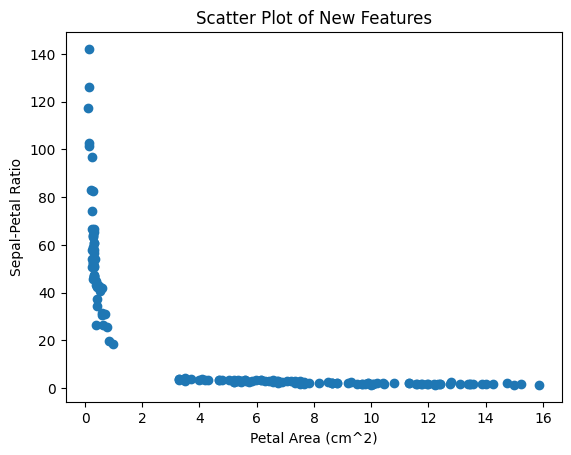

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(new_features[:, 0], new_features[:, 1])
plt.xlabel('Petal Area (cm^2)')
plt.ylabel('Sepal-Petal Ratio')
plt.title('Scatter Plot of New Features')
plt.show()

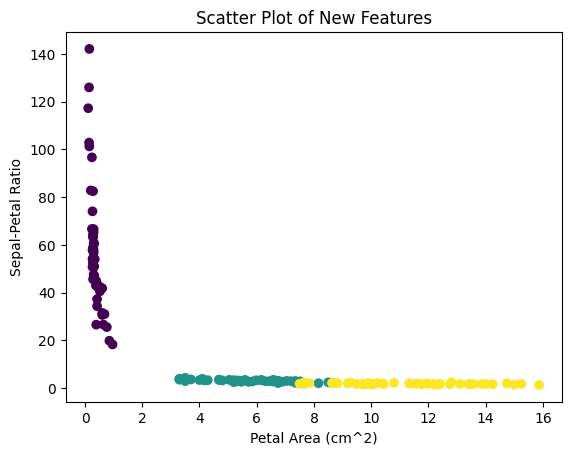

In [ ]:

plt.scatter(new_features[:, 0], new_features[:, 1], c = y)
plt.xlabel('Petal Area (cm^2)')
plt.ylabel('Sepal-Petal Ratio')
plt.title('Scatter Plot of New Features')
plt.show()

In [ ]:
X = new_features[:, :2]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
preds = clf.predict(X_test)
print('predictions')
print(preds)

predictions
[1 1 1 1 0 1 1 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


In [ ]:
print('actual iris species')
print(y_test)

actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9666666666666667


#Question 2

X_train shape: (29492, 785), y_train shape: (29492,)
X_test shape: (4926, 785), y_test shape: (4926,)
training images shapes:  (29492, 28, 28)
testing images shapes:  (4926, 28, 28)
training targets shapes:  (29492,)
testing targers shapes:  (4926,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   

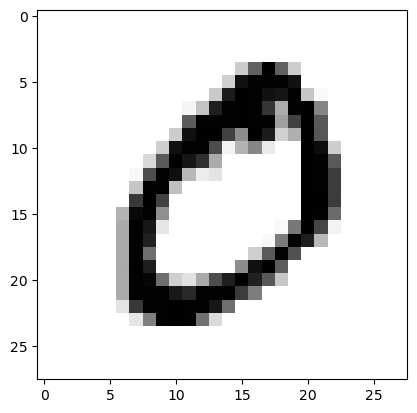

In [4]:
#taken from lecture 2 notes and code



from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#only use even numbers
even_train_cases = np.isin(y_train, [0, 2, 4, 6, 8])
even_test_cases = np.isin(y_test, [0, 2, 4, 6, 8])

x_train = x_train[even_train_cases]
y_train = y_train[even_train_cases]
x_test = x_test[even_test_cases]
y_test = y_test[even_test_cases]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


#show what we are working with
print("training images shapes: ", x_train.shape)
print("testing images shapes: ", x_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targers shapes: ", y_test.shape)
plt.imshow(x_train[0], cmap=plt.cm.gray_r, interpolation="nearest")
print(x_train[0])

In [5]:
# Flatten the images (28x28 to 1D array of size 784)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


# data frames
df_train = pd.DataFrame(x_train_flat)
df_train['label'] = y_train

df_test = pd.DataFrame(x_test_flat)
df_test['label'] = y_test

#show examples
print("Train DataFrame sample:")
print(df_train.head())

print("\nTest DataFrame sample:")
print(df_test.head())


Train DataFrame sample:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      0  
1    0      4  
2    0      2  
3    0      4  
4    0      6  

[5 rows x 785 columns]

Test DataFrame sample:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0

preds: [2 0 4 ... 2 4 6]
actual: [2 0 4 ... 2 4 6]
Overall Accuracy: 0.9868047097036134
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           2       0.99      0.98      0.99      1032
           4       0.99      0.99      0.99       982
           6       0.99      0.99      0.99       958
           8       0.99      0.97      0.98       974

    accuracy                           0.99      4926
   macro avg       0.99      0.99      0.99      4926
weighted avg       0.99      0.99      0.99      4926



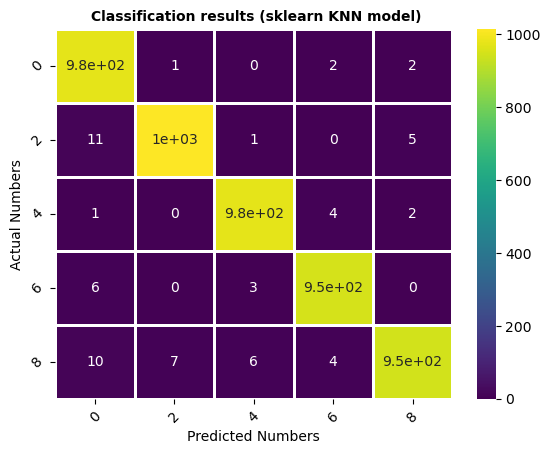

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#taken from professors github

X_train =df_train.to_numpy()
y_train = df_train['label'].to_numpy()
X_test = df_test.to_numpy()
y_test = df_test['label'].to_numpy()

from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(X_train,y_train)
print('preds:', skmodel.predict(X_test))
print('actual:', y_test)
cm_sk = confusion_matrix(y_test, skmodel.predict(X_test))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels([0, 2, 4, 6, 8]);
ax.set_yticklabels([0, 2, 4, 6, 8]);
print('Overall Accuracy: {}'.format(accuracy_score(y_test, skmodel.predict(X_test))))
plt.xlabel('Predicted Numbers');
plt.ylabel('Actual Numbers');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(X_test)))

#Question 3

In [62]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#uses professors git hub code with modifications

data = load_iris()

df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]


display(df)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
X = df.to_numpy()
X = np.delete(X, 3, 1)  #only use 3 features

df['target'] = data['target']
named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])

df['species_name'] = named_targets


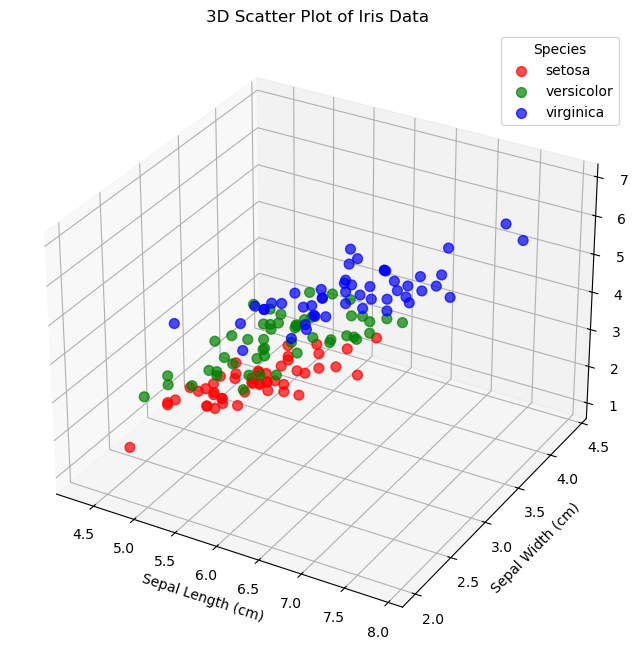

In [59]:
from mpl_toolkits.mplot3d import Axes3D
# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['species_name'] = [data['target_names'][i] for i in data['target']]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map species to colors
species_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}

# Plot each species
for species, color in species_colors.items():
    species_data = df[df['species_name'] == species]
    ax.scatter(
        species_data['sepal length (cm)'],
        species_data['sepal width (cm)'],
        species_data['petal length (cm)'],
        label=species,
        color=color,
        s=50,
        alpha=0.7
    )

# Add labels and legend
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.legend(title="Species")
plt.title("3D Scatter Plot of Iris Data")
plt.show()


In [64]:
#getting data split

from sklearn.model_selection import train_test_split


y = df['target'].to_numpy()
X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)





X_train shape : (105, 3)
X_test shape : (45, 3)
y_train shape : (105,)
y_test shape : (45,)


In [65]:
#KMeans model from class

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]
model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted_labels: [2 1 2 1 1 0 0 2 0 0 1 0 1 0 2 0 2 2 0 0 0 0 0 2 0 2 1 0 1 1 1 1 2 2 2 2 2
 1 1 0 1 2 2 1 2]
cluster centroids: [[5.04285714 3.43428571 1.48857143]
 [6.77857143 3.02857143 5.62142857]
 [5.82619048 2.72142857 4.35238095]]


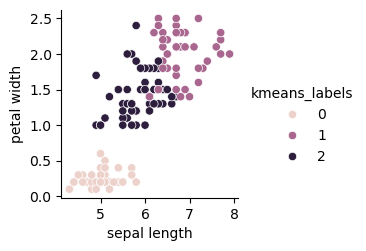

In [67]:
df['kmeans_labels'] = model.predict(X)

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='kmeans_labels')

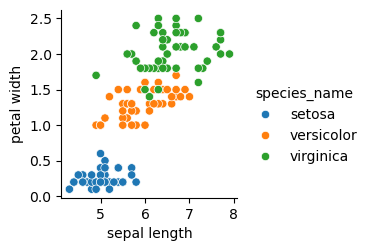

In [68]:
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='species_name')

Text(0, 0.5, 'petal width')

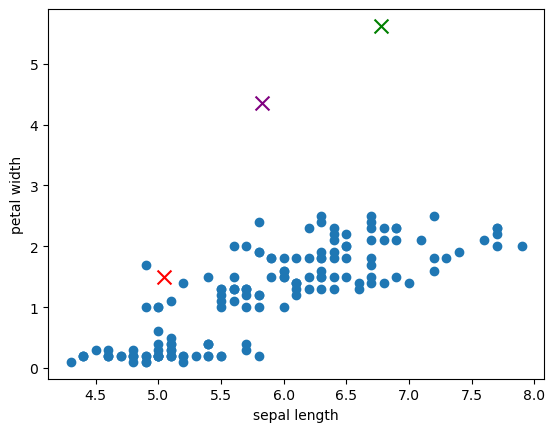

In [70]:
plt.scatter(df['sepal length'].to_list(), df['petal width'].to_list())
plt.scatter(cluster_coords[0][0], cluster_coords[0][2], color='red', marker='x', s=100)
plt.scatter(cluster_coords[1][0], cluster_coords[1][2], color='green', marker='x', s=100)
plt.scatter(cluster_coords[2][0], cluster_coords[2][2], color='purple', marker='x', s=100)
plt.xlabel('sepal length')
plt.ylabel('petal width')

C:\Users\morrea\anaconda3\envs\mane4960\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


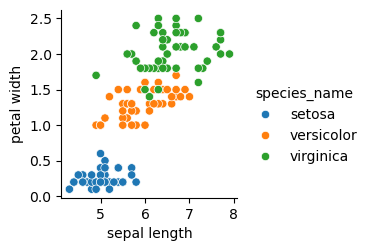

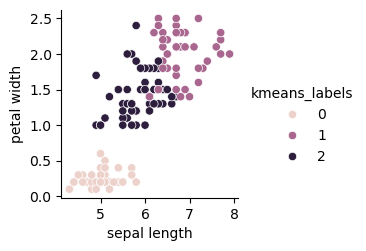

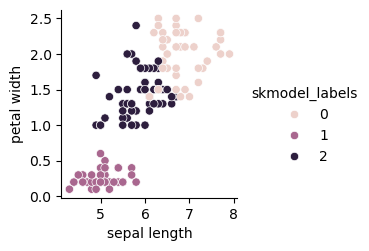

In [73]:
# sklearn

from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)

skmodel.labels_ # training labels

skmodel.predict(X_test)

skmodel_labels = skmodel.predict(X)
df['skmodel_labels'] = skmodel_labels
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='species_name')
# too many plots so let's trim them down

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='kmeans_labels')
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='skmodel_labels')

Text(0, 0.5, 'petal width')

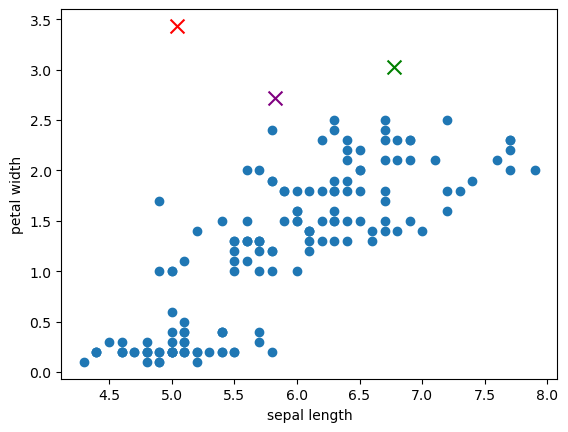

In [75]:

plt.scatter(df['sepal length'].to_list(), df['petal width'].to_list())
plt.scatter(cluster_coords[0][0], cluster_coords[0][1], color='red', marker='x', s=100)
plt.scatter(cluster_coords[1][0], cluster_coords[1][1], color='green', marker='x', s=100)
plt.scatter(cluster_coords[2][0], cluster_coords[2][1], color='purple', marker='x', s=100)
plt.xlabel('sepal length')
plt.ylabel('petal width')